<a href="https://colab.research.google.com/github/YonDraco/learn-pyimagesearch/blob/master/1_convolutions_cross_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

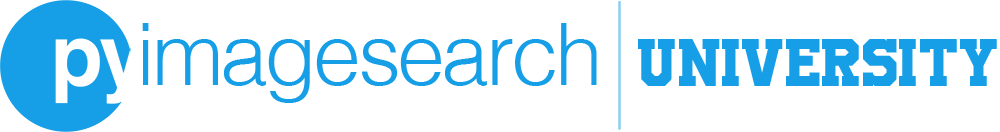

# Convolution and cross-correlation in neural networks
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch University](https://pyimg.co/university)** Jupyter Notebooks!

This notebook is associated with the [Convolution and cross-correlation in neural networks](https://www.pyimagesearch.com/2021/05/14/convolution-and-cross-correlation-in-neural-networks/) blog post published on 2021-05-14.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch University Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch University at https://pyimg.co/university today.*

### Download the code zip file

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/convolutions-cross-correlation/convolutions-cross-correlation.zip
!unzip -qq convolutions-cross-correlation.zip
%cd convolutions-cross-correlation

--2021-08-25 17:02:41--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/convolutions-cross-correlation/convolutions-cross-correlation.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.181.177
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.181.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433968 (424K) [binary/octet-stream]
Saving to: ‘convolutions-cross-correlation.zip’

convolutions-cross- 100%[===================>] 423.80K  1.27MB/s    in 0.3s    

2021-08-25 17:02:42 (1.27 MB/s) - ‘convolutions-cross-correlation.zip’ saved [433968/433968]

/content/convolutions-cross-correlation


## Blog Post Code

### Import Packages

In [ ]:
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Implementing Convolutions with Python 


In [ ]:
def convolve(image, K):
	# grab the spatial dimensions of the image and kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = K.shape[:2]

	# allocate memory for the output image, taking care to "pad"
	# the orders of the input image so the spatial size (i.e.,
	# width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top-to-bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplication between the ROI and
			# the kernel, the summing the matrix
			k = (roi * K).sum()

			# store the convolved value in the output (x, y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")

	# return the output image
	return output

In [ ]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

In [ ]:
# construct a sharpening filter
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

In [ ]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

In [ ]:
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

In [ ]:
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

In [ ]:
# construct an emboss kernel
emboss = np.array((
	[-2, -1, 0],
	[-1, 1, 1],
	[0, 1, 2]), dtype="int")

In [ ]:
# construct the kernel bank, a list of kernels we're going to apply
# using both our custom `convole` function and OpenCV's `filter2D`
# function
kernelBank = (
	("small_blur", smallBlur),
	("large_blur", largeBlur),
	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY),
	("emboss", emboss))

In [ ]:
# load the input image and convert it to grayscale
image = cv2.imread("jemma.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel
[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel
[INFO] applying emboss kernel


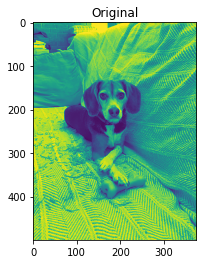

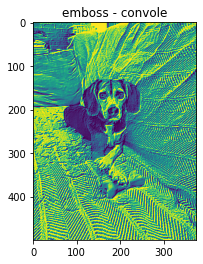

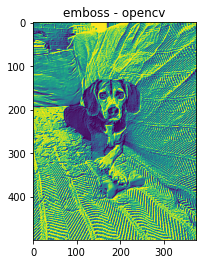

In [ ]:
# loop over the kernels
for (kernelName, K) in kernelBank:
	# apply the kernel to the grayscale image using both our custom
	# `convolve` function and OpenCV's `filter2D` function
	print("[INFO] applying {} kernel".format(kernelName))
	convolveOutput = convolve(gray, K)
	opencvOutput = cv2.filter2D(gray, -1, K)

# show the output images
plt_imshow("Original", gray)
plt_imshow("{} - convole".format(kernelName), convolveOutput)
plt_imshow("{} - opencv".format(kernelName), opencvOutput)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Convolution and cross-correlation in neural networks*](https://www.pyimagesearch.com/2021/05/14/convolution-and-cross-correlation-in-neural-networks/) published on 2021-05-14.

# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

2.   **[Convolutional Neural Networks (CNNs) and Layer Types](https://www.pyimagesearch.com/2021/05/14/convolutional-neural-networks-cnns-and-layer-types/)** 
3.   **[Are CNNs invariant to translation, rotation, and scaling?](https://www.pyimagesearch.com/2021/05/14/are-cnns-invariant-to-translation-rotation-and-scaling/)** 